# 01 ws

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(X_train, _), (X_test, _) = fashion_mnist.load_data()

print(X_train.shape)
print(X_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 5us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 19s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 4s 1us/step
(60000, 28, 28)
(10000, 28, 28)


In [3]:
X_train[0][:, 7:20]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1],
       [  0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,  54,   0],
       [  0,   0,   0,   0,   0,   6,   0, 102, 204, 176, 134, 144, 123],
       [  0,   0,   0,   0,   0,   0,   0, 155, 236, 207, 178, 107, 156],
       [  0,   0,   0,   0,   1,   0,  69, 207, 223, 218, 216, 216, 163],
       [  0,   0,   1,   1,   1,   0, 200, 232, 232, 233, 229, 223, 223],
       [  0,   0,   0,   0,   0,   0, 183, 225, 216, 223, 228, 235, 227],
       [  0,   0,   0,   0,   0,   0, 193, 228, 218, 213, 198, 180, 212],
       [  0,   0,   1,   3,   0,  12, 219, 220, 212, 218, 192, 169, 227],
       [  0,   0,   0,   6,   0,  99, 244, 222, 220, 218, 203, 198, 221],
       [  0,   0,   4,   0,   0,  55, 

### Visualize

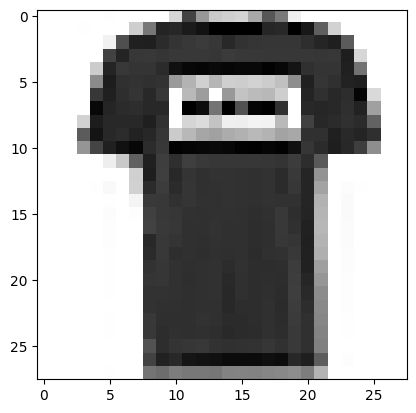

In [4]:
img = X_train[1]
plt.imshow(img, cmap=plt.cm.gray_r) # 

plt.show()

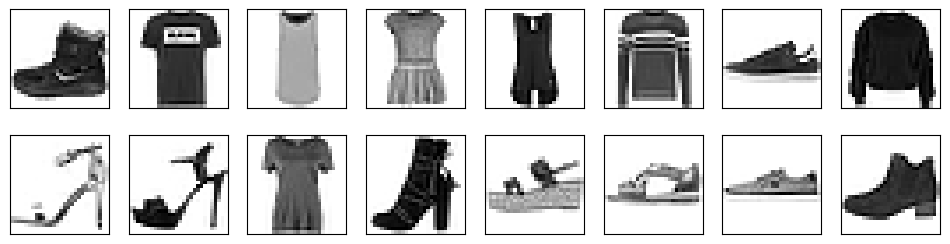

In [5]:
def visual_multi(i):

    nplots = 16
    fig = plt.figure(figsize=(12, 3)) #
    for j in range(nplots):

        plt.subplot(2, 8, j+1)
        plt.imshow(X_train[i+j], cmap=plt.cm.gray_r)

        plt.xticks([]); plt.yticks([])

    plt.show()

visual_multi(0)

In [6]:
# X_train = X_train.astype('float32') / 255.0
# X_test = X_test.astype('float32') / 255.0

X_train = X_train / 255.0          #  ONCE
X_test = X_test / 255.0

In [7]:
np.min(X_train), np.max(X_train)

(0.0, 1.0)

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
from tensorflow.keras.layers import Dense, Flatten, Reshape #
from tensorflow.keras import Model, Sequential

encoding_dim = 36 

class Autoencoder(Model):
    def __init__(self, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoding_dim = encoding_dim   
        self.encoder = Sequential([
#             InputLayer(input_shape=(28,28)),
            Flatten(),
            Dense(encoding_dim, activation='relu'),
        ])
        self.decoder = Sequential([
            Dense(784, activation='sigmoid'),
            Reshape((28, 28))
        ])
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder(encoding_dim)

In [10]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(X_train, X_train, epochs=20,
                batch_size=256,
                validation_data=(X_test, X_test))

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.4910 - val_loss: 0.3415
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3318 - val_loss: 0.3183
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3134 - val_loss: 0.3071
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3031 - val_loss: 0.2990
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2947 - val_loss: 0.2939
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2909 - val_loss: 0.2909
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2882 - val_loss: 0.2888
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2856 - val_loss: 0.2874
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2853 - val_loss: 0.2865
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2844 - val_loss: 0.2858
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2832 - val_loss: 0.2854
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

In [11]:
autoencoder.encoder.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 36)             │        28,260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,260 (110.39 KB)

 Trainable params: 28,260 (110.39 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
autoencoder.decoder.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 784)            │        29,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 28, 28)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,008 (113.31 KB)

 Trainable params: 29,008 (113.31 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
encoded_imgs = autoencoder.encoder(X_test).numpy() 
print(encoded_imgs.shape)  

(10000, 36)


In [14]:
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()  
decoded_imgs.shape

(10000, 28, 28)

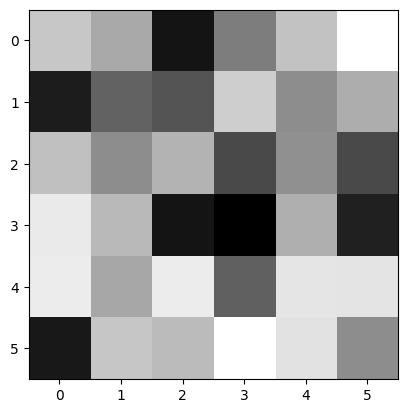

In [15]:
plt.imshow(encoded_imgs[0].reshape(6,6), cmap=plt.cm.gray_r)

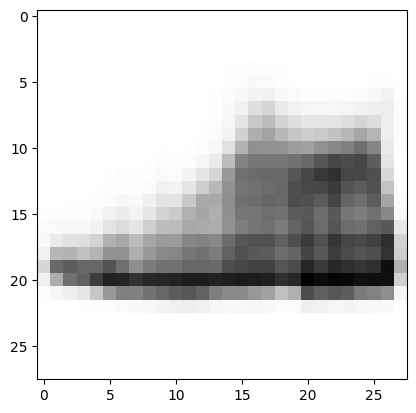

In [16]:
plt.imshow(decoded_imgs[0], cmap=plt.cm.gray_r)

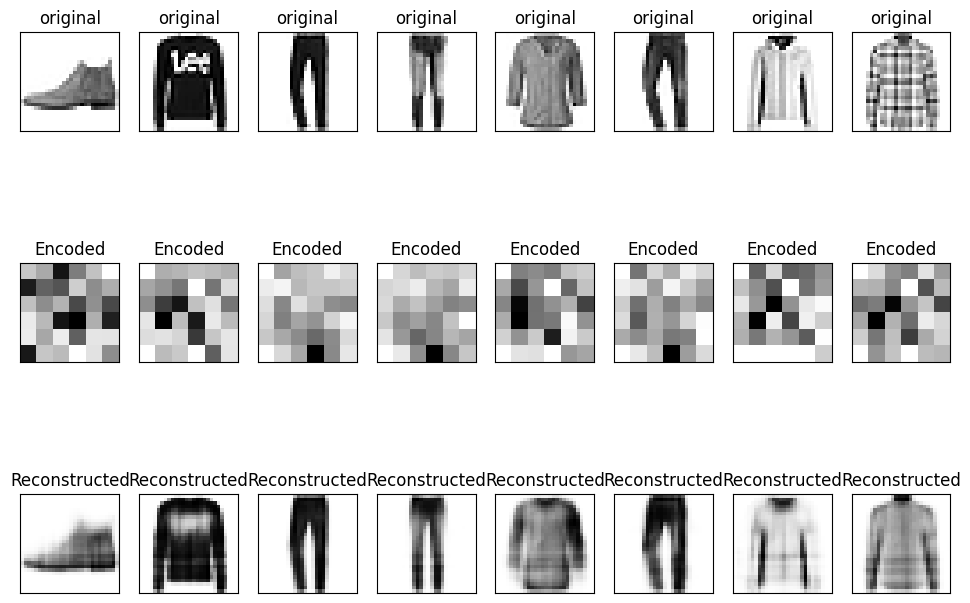

In [17]:
n = 8
plt.figure(figsize=(14-2, 5.8+2.7)) 
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.title("original")
    plt.imshow(X_test[i], cmap=plt.cm.gray_r)
    plt.xticks([]); plt.yticks([])

    bx = plt.subplot(3, n, n+i+1)
    plt.title("Encoded")
    plt.imshow(encoded_imgs[i].reshape(6,6), cmap=plt.cm.gray_r)

    plt.xticks([]); plt.yticks([])

    cx = plt.subplot(3, n, 2*n + i+ 1)
    plt.title("Reconstructed")
    plt.imshow(decoded_imgs[i], cmap=plt.cm.gray_r)
    plt.xticks([]); plt.yticks([])

plt.show()

# ws02 Denoise

In [18]:
(X_train, _), (X_test, _) = fashion_mnist.load_data()

print(X_train.shape)

X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = np.expand_dims(X_train, -1) # 
X_test = np.expand_dims(X_test, -1)

print(X_train.shape)

(60000, 28, 28)
(60000, 28, 28, 1)


In [19]:
noise_factor = 0.2
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, 
                                                          scale=1.0, size=X_train.shape) 
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, 
                                                        scale=1.0, size=X_test.shape) 

X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

X_train.shape

(60000, 28, 28, 1)

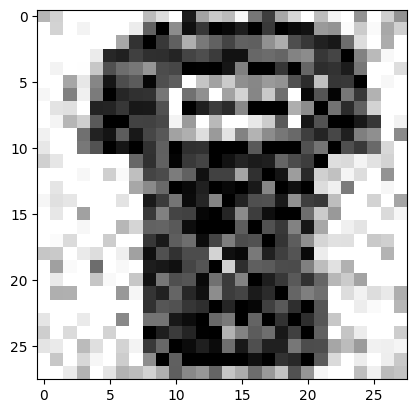

In [20]:
img = X_train_noisy[1]
plt.imshow(img, cmap=plt.cm.gray_r) 
plt.show()

### Model

In [21]:

from tensorflow.keras.layers import InputLayer,Conv2D, Conv2DTranspose 

class Denoise(Model):
    def __init__(self):
        super(Denoise, self).__init__()
        self.encoder = Sequential([

            Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
            Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

        self.decoder = Sequential([
            Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
            Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
            Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Denoise()

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [22]:
autoencoder.fit(X_train_noisy, X_train, epochs=10,
                batch_size=128,
                validation_data=(X_test, X_test) )

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.4573 - val_loss: 0.2893
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.2847 - val_loss: 0.2817
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.2784 - val_loss: 0.2793
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.2765 - val_loss: 0.2759
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.2737 - val_loss: 0.2736
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.2730 - val_loss: 0.2726
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.2725 - val_loss: 0.2728
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.2719 - val_loss: 0.2722
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.2713 - val_loss: 0.2721
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.2712 - val_loss: 0.2726


In [23]:
autoencoder.encoder.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 14, 14, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 8)        │         1,160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,320 (5.16 KB)

 Trainable params: 1,320 (5.16 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
autoencoder.decoder.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_transpose                │ (None, 14, 14, 8)      │           584 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 28, 28, 16)     │         1,168 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 1)      │           145 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,897 (7.41 KB)

 Trainable params: 1,897 (7.41 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
encoded_imgs = autoencoder.encoder(X_test_noisy).numpy() 
print(encoded_imgs.shape)

decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
decoded_imgs.shape

(10000, 7, 7, 8)


(10000, 28, 28, 1)

### Visual

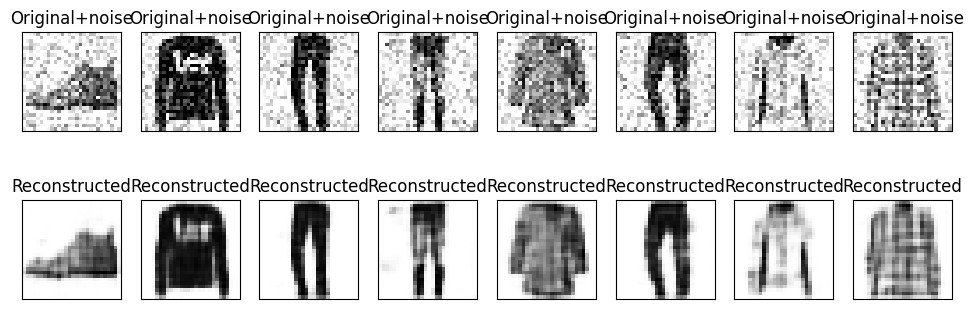

In [26]:
n = 8
plt.figure(figsize=(12, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i+1)
    plt.title("Original+noise")
    plt.imshow(np.squeeze(X_test_noisy[i]), cmap=plt.cm.gray_r)
    plt.imshow(X_test_noisy[i], cmap=plt.cm.gray_r)
    plt.xticks([]); plt.yticks([])

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("Reconstructed")
    plt.imshow(np.squeeze(decoded_imgs[i]), cmap=plt.cm.gray_r)
    plt.xticks([]); plt.yticks([])

plt.show()